# Time Series Dataset


#stock price data is a time series data. Let's take a look at Apple stock price data; this data can be downloaded from the NASDAQ site (https://www.nasdaq.com/symbol/aapl/historical).

In [2]:
import datetime
from pandas_datareader import DataReader
from matplotlib import pyplot as plt
%matplotlib inline


Apple = DataReader("AAPL", "yahoo", 
        start=datetime.datetime(2010, 1, 1), 
        end=datetime.datetime(2015,12,31)) 
Apple.head()

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2009-12-31  30.478571  30.080000  30.447144  30.104286   88102700.0  20.073631
2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0  20.386072
2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0  20.421322
2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0  20.096491
2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0  20.059338

In [ ]:
close = Apple['Adj Close']
plt.figure(figsize= (10,10))
close.plot()
plt.ylabel("Apple stocj close price")
plt.show()

# Natural Language - Text

In [ ]:
f = open('text_data.txt')
text = f.read()
print(text)

In [ ]:
# clean data
import re
# remove Punctuation
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

In [ ]:
# Normalize text
# Convert to lowercase
text = text.lower() 
print(text)

In [ ]:
import os
import nltk
nltk.download('punkt') 
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words_nltk = word_tokenize(text)
print(words_nltk)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#Remove stop words
words = [w for w in words_nltk \
        if w not in stopwords.words("english")]

print (words)

In [ ]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)


In [ ]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

# Natural Language - Audio

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Get the file path to the included audio example
filename = '/home/msaleem/Ahmer/MachineLearning/AI_BootCamp/cartoon-birds-2_daniel-simion.wav'
filename2 = '/home/msaleem/Ahmer/MachineLearning/AI_BootCamp/airplane-landing_daniel_simion.wav'
# filename = librosa.util.example_audio_file()

In [ ]:
input_length=16000*4
def audio_norm(data):
    # Function to Normalize
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data) 
    return data

def load_audio_file(file_path, 
            input_length=input_length):
    # Function to load an audio file and 
    # return a 1D numpy array 
    data, sr = librosa.load(file_path, sr=None)
 
    max_offset = abs(len(data)-input_length)
    offset = np.random.randint(max_offset)
    if len(data)>input_length:
        data = data[offset:(input_length+offset)]
    else:
        data = np.pad(data, (offset, 
            input_size - len(data) - offset), 
            "constant")    
 
    data = audio_norm(data)
    return data

In [ ]:
data_base = load_audio_file(filename)
data_base2 = load_audio_file(filename2)

fig = plt.figure(figsize=(14, 8))
plt.title('Raw wave ')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, 1, input_length), data_base)
plt.show()

fig = plt.figure(figsize=(14, 8))
plt.title('Raw wave ')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, 1, input_length), data_base2)
plt.show()

# Computer Vision - Images

In [1]:
import cv2

image_path = '/home/msaleem/Ahmer/MachineLearning/AI_BootCamp/lena.jpg'
image = cv2.imread(image_path) # BGR image
print (image.shape) # rows, columns and channels

(1960, 1960, 3)


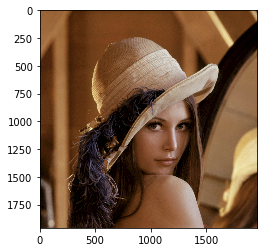

In [3]:
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
# cv2.imshow('Image',image)
# cv2.waitKey(2)

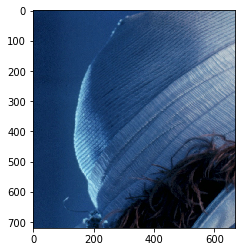

In [9]:
ROI = image[280:1000, 330:1000]
plt.imshow(ROI)
# cv2.imshow('Image',ROI)
# cv2.waitKey(0)

In [10]:
print(image)

[[[ 57 104 156]
  [ 58 104 158]
  [ 58 104 158]
  ...
  [  9  30  57]
  [  5  28  54]
  [  8  30  58]]

 [[ 57 104 156]
  [ 58 104 158]
  [ 59 105 159]
  ...
  [  8  31  57]
  [  4  27  53]
  [  7  29  57]]

 [[ 57 104 156]
  [ 59 105 159]
  [ 59 105 159]
  ...
  [  9  32  58]
  [  7  30  56]
  [ 10  33  59]]

 ...

 [[  9  31  56]
  [  8  30  55]
  [  8  30  55]
  ...
  [ 47  74 118]
  [ 45  72 116]
  [ 44  71 115]]

 [[  9  32  58]
  [  7  30  56]
  [  8  29  56]
  ...
  [ 47  74 118]
  [ 46  73 117]
  [ 46  73 117]]

 [[ 13  36  62]
  [  9  32  58]
  [  7  30  56]
  ...
  [ 45  72 116]
  [ 47  74 118]
  [ 49  76 120]]]


In [11]:
resize1 = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
print (resize1.shape)
resize2 = cv2.resize(image, (100, 50)) 
print (resize2.shape)

(980, 980, 3)
(50, 100, 3)


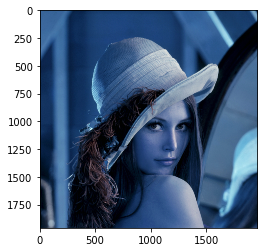

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur1 = cv2.blur(image,(5,5))
blur2 = cv2.GaussianBlur(image,(13,13),0)
#print (gray.dtype)
# cv2.imshow('sss',blur1)
# cv2.waitKey(0)
plt.imshow(blur1)


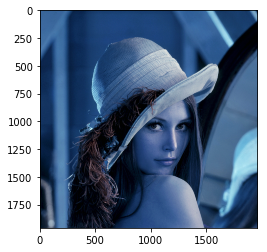

In [20]:
plt.imshow(blur2)

In [21]:
cv2.imwrite('results.jpg',blur2)

True

# Computer Vision - Videos

In [2]:
import cv2

source = 0
cap = cv2.VideoCapture(source)

while(1):
    hasFrame, frame = cap.read()
    
    if not hasFrame:
        print ("Unable to fetch frames")
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Face Detection Comparison", frame)
    k = cv2.waitKey(10)
    if k == ord('q'):
        break